In [1]:
# Celda 1: instalación de dependencias

# Clonar el repositorio YOLOv5
!git clone https://github.com/ultralytics/yolov5  

# Cambiar al directorio del repositorio clonado
import os
os.chdir('yolov5')

# Instalar las dependencias YOLOv5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16866, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 16866 (delta 23), reused 36 (delta 6), pack-reused 16805 (from 1)
Receiving objects: 100% (16866/16866), 15.60 MiB | 39.06 MiB/s, done.
Resolving deltas: 100% (11552/11552), done.


In [6]:
"Renombrar las clases"
import os

# Directorios de etiquetas
label_dirs = ['/workspaces/TFM-Master4-0/TFM-Master4-0/Codigo_Reduccion_Dataset/Train-Images', '/workspaces/TFM-Master4-0/TFM-Master4-0/Codigo_Reduccion_Dataset/Val-Images']

# Mapeo de clases según las reglas especificadas
def map_class(class_id):
    if 0 <= class_id <= 16:
        return 0
    elif 17 <= class_id <= 19:
        return 1
    elif class_id == 20:
        return 2
    elif class_id == 21:
        return 3
    elif class_id in [22, 23]:
        return 4
    elif 24 <= class_id <= 27:
        return 5
    else:
        return None  # Si hay alguna clase fuera de este rango, la ignoramos

# Recorrer y modificar todos los archivos de etiquetas en los directorios de entrenamiento y validación
for label_dir in label_dirs:
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            label_path = os.path.join(label_dir, label_file)
            with open(label_path, 'r') as file:
                lines = file.readlines()
            
            # Modificar las clases según el mapeo
            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) > 0:
                    class_id = int(parts[0])
                    new_class_id = map_class(class_id)
                    if new_class_id is not None:
                        parts[0] = str(new_class_id)
                        new_lines.append(" ".join(parts) + '\n')

            # Guardar los cambios en el archivo de etiquetas
            with open(label_path, 'w') as file:
                file.writelines(new_lines)

print("Las clases han sido renombradas correctamente en todos los archivos de entrenamiento y validación.")

Las clases han sido renombradas correctamente en todos los archivos de entrenamiento y validación.


In [7]:
# Celda 2a: Creación del archivo Detección-residuos.yml
import os

# Obtener la ruta absoluta del directorio 'Codigo_TFM_2'
abs_path = os.path.abspath('.')
print(f"La ruta absoluta es: {abs_path}")

# Crear el archivo YAML de configuración con rutas absolutas
train_path = '/workspaces/TFM-Master4-0/TFM-Master4-0/Codigo_Reduccion_Dataset/Train-Images'
val_path = '/workspaces/TFM-Master4-0/TFM-Master4-0/Codigo_Reduccion_Dataset/Val-Images'

data_yaml = f"""
train: {train_path}
val: {val_path}

nc: 6  # Número de clases
names: ['botellas de plástico', 'botellas de vidrio', 'frascos', 'latas', 'cartón', 'detergentes']
"""

# Guardar el archivo como Detección-residuos.yml en el directorio actual
yaml_path = os.path.join(abs_path, 'Detección-residuos.yml')
with open(yaml_path, 'w') as f:
    f.write(data_yaml)

print(f"Archivo Detección-residuos.yml guardado con éxito en {yaml_path}")

La ruta absoluta es: /workspaces/TFM-Master4-0/TFM-Master4-0/Codigo_Reduccion_Dataset/yolov5
Archivo Detección-residuos.yml guardado con éxito en /workspaces/TFM-Master4-0/TFM-Master4-0/Codigo_Reduccion_Dataset/yolov5/Detección-residuos.yml


Ejemplos de imágenes de entrenamiento:


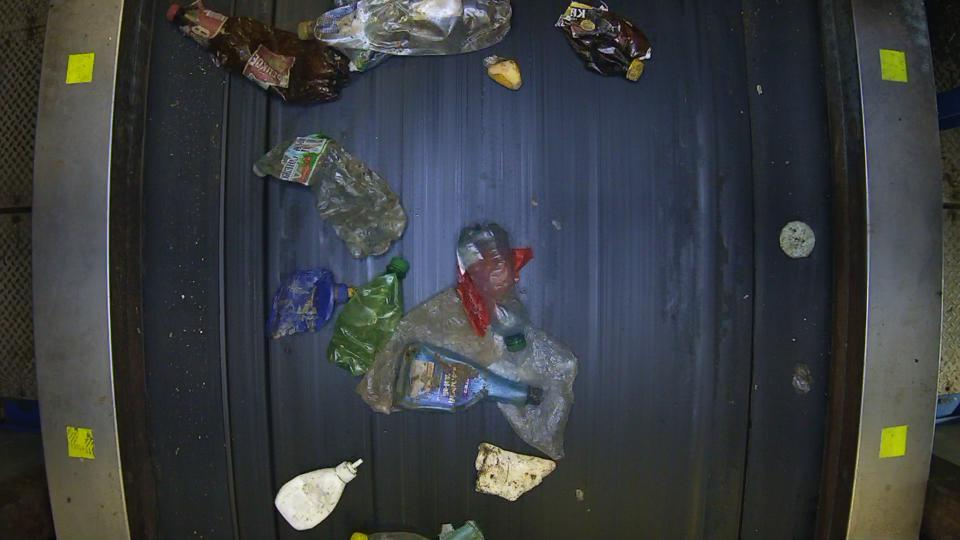

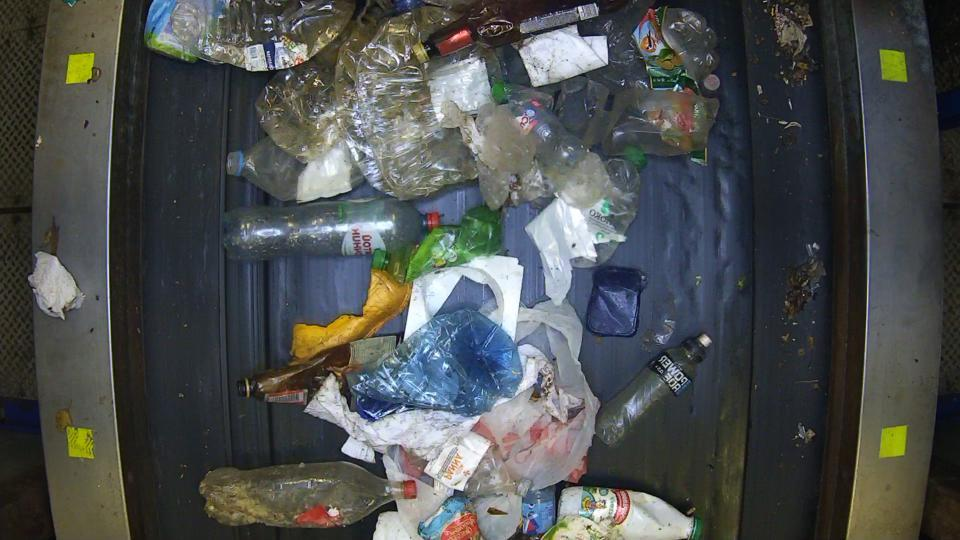

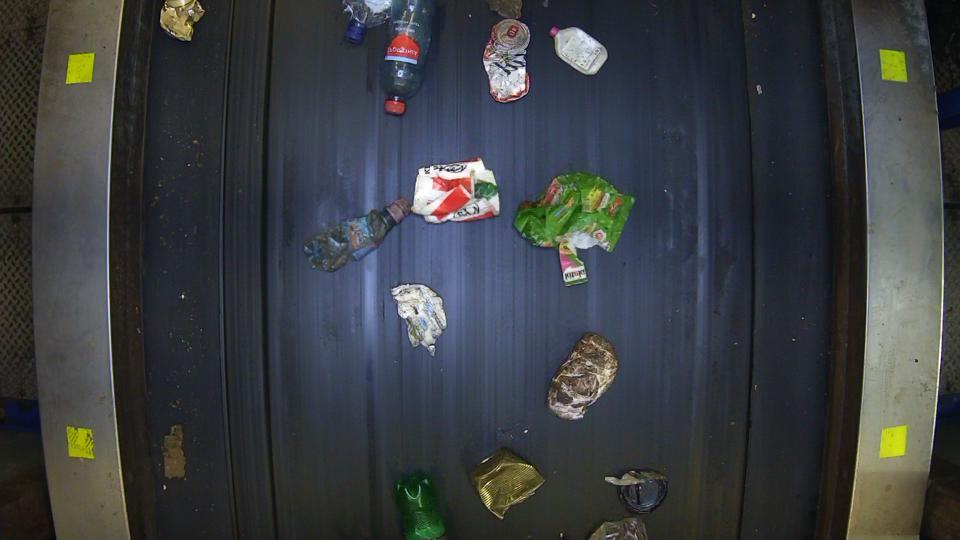

Ejemplos de imágenes de validación:


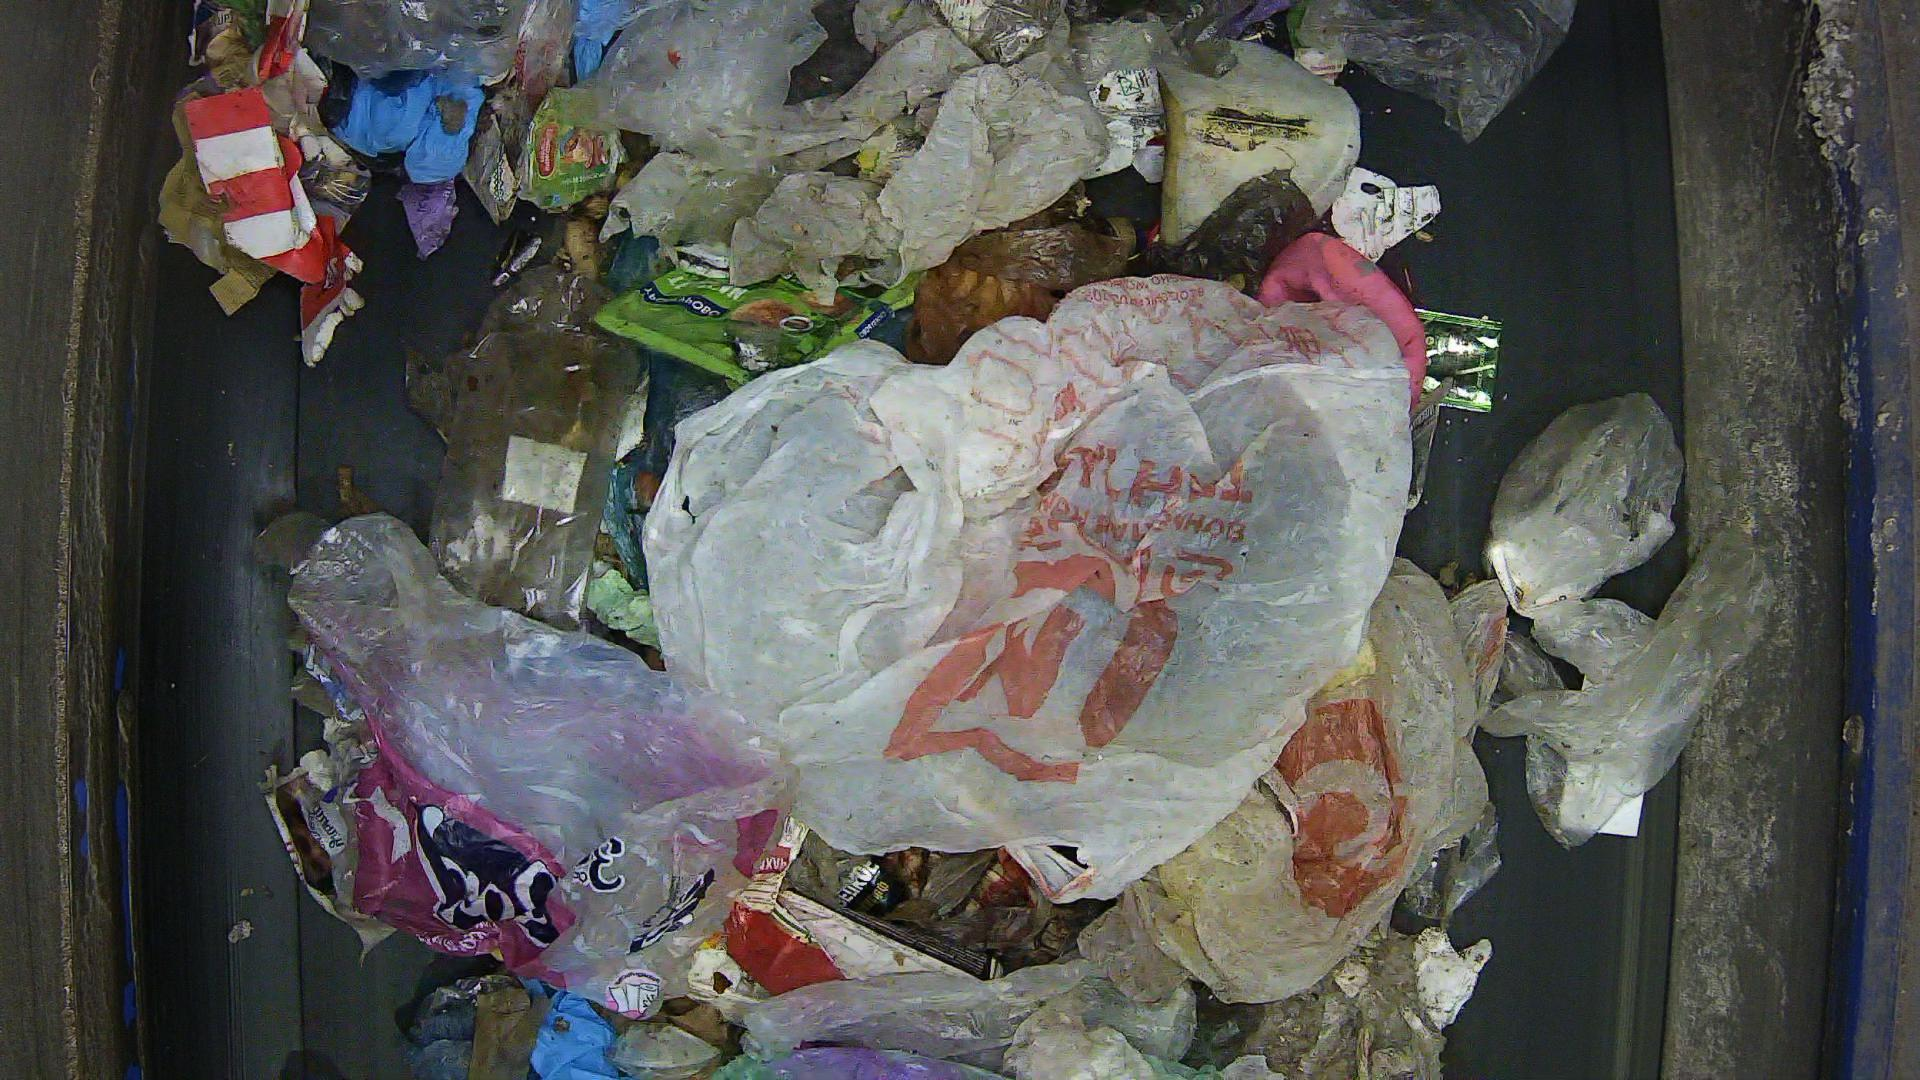

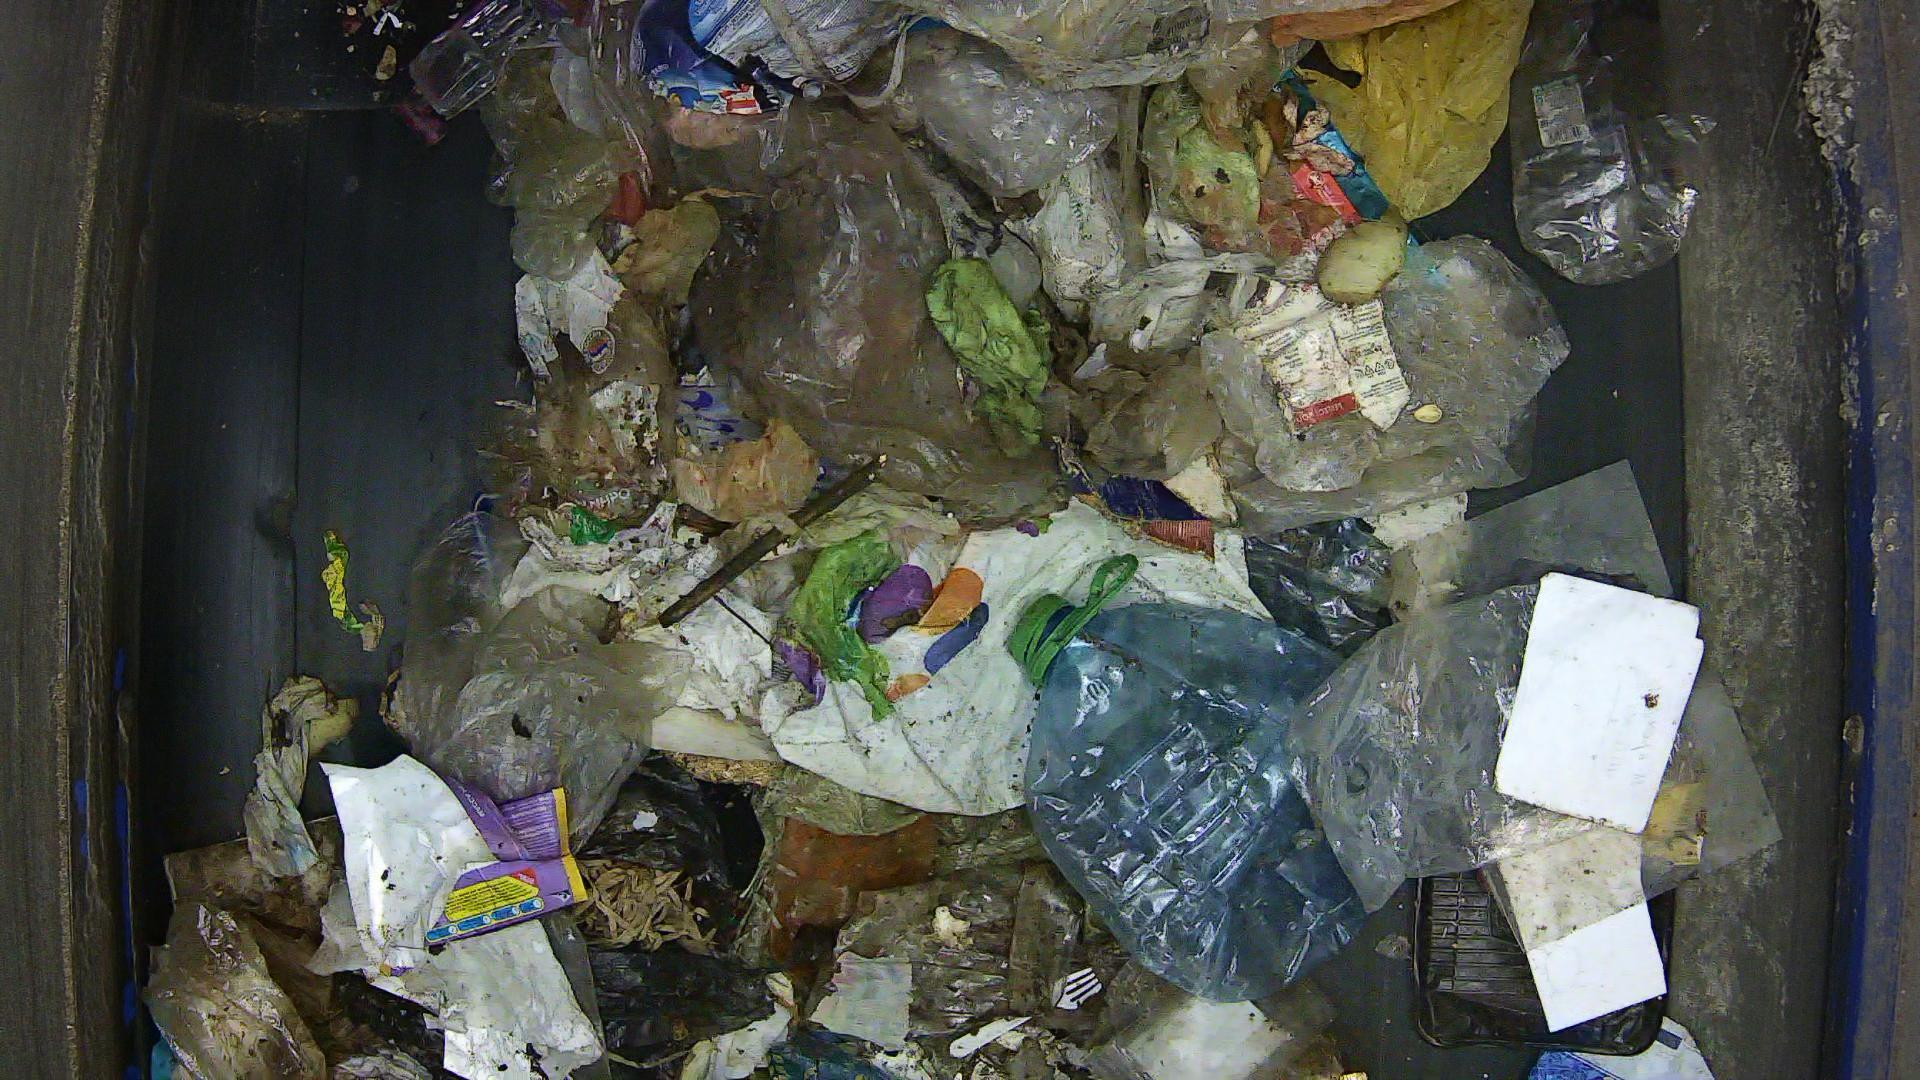

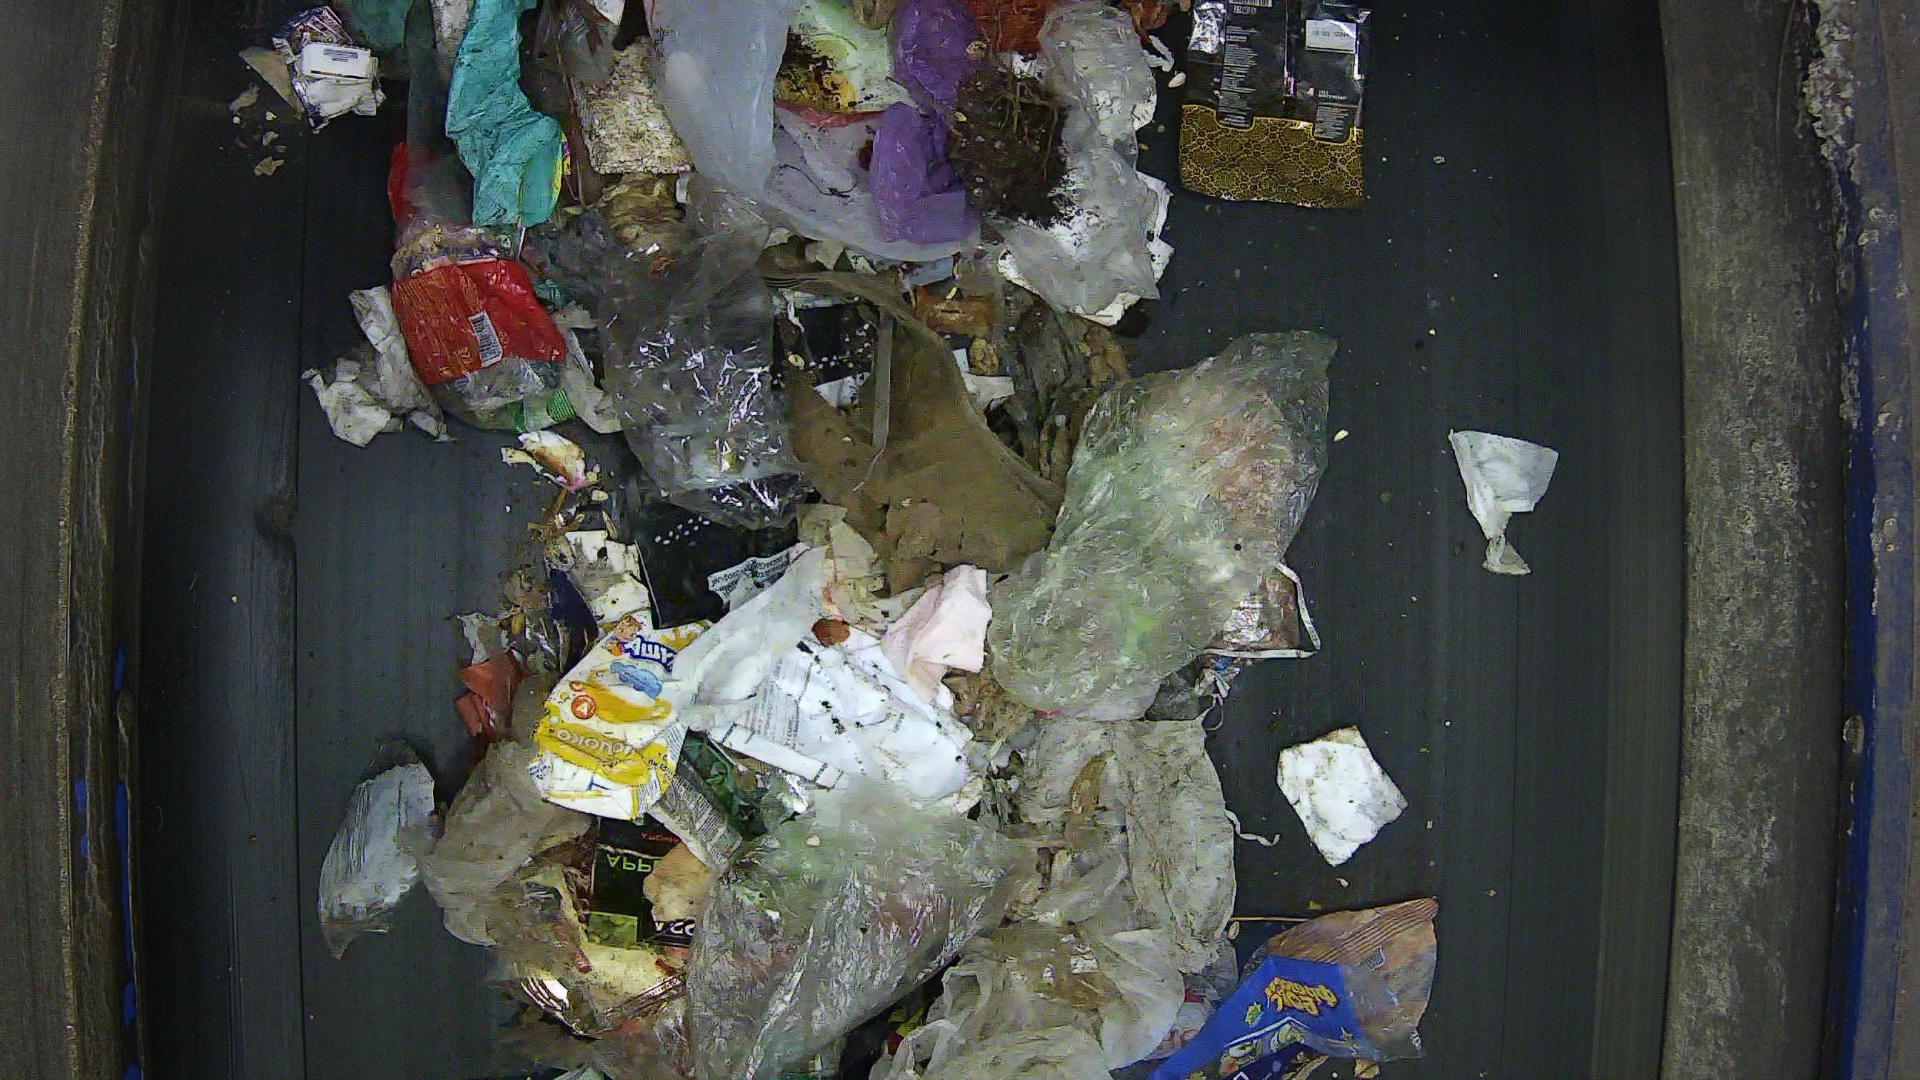

In [8]:
# Celda 3a: Verificación de los datos Yolov5
from IPython.display import Image, display
import glob

# Mostrar algunas imágenes de entrenamiento
train_images = glob.glob('/workspaces/TFM-Master4-0/TFM-Master4-0/Codigo_Reduccion_Dataset/Train-Images/*.jpg')[:3]  # Cambiar a la ruta correcta
val_images = glob.glob('/workspaces/TFM-Master4-0/TFM-Master4-0/Codigo_Reduccion_Dataset/Val-Images/*.jpg')[:3]  # Cambiar a la ruta correcta

print("Ejemplos de imágenes de entrenamiento:")
for img in train_images:
    display(Image(filename=img))

print("Ejemplos de imágenes de validación:")
for img in val_images:
    display(Image(filename=img))

In [16]:
# Celda 4a: Entrenamiento del modelo YOLOv5
!python train.py --img 640 --batch 8 --epochs 15 --data Detección-residuos.yml --weights yolov5s.pt --cache ram --workers 0

train: weights=yolov5s.pt, cfg=, data=Detección-residuos.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-358-gc07b9a8b Python-3.10.13 torch-2.4.0+cu121 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0

In [20]:
#Celda 5a: Evaluación del Rendimiento de Yolov5
import pandas as pd

# Cargar el archivo de resultados
results_file = '/workspaces/TFM-Master4-0/TFM-Master4-0/Codigo_Reduccion_Dataset/yolov5/runs/train/exp7/results.csv'  

# Leer los resultados
df = pd.read_csv(results_file)

# Extraer los nombres de las columnas y eliminar espacios en blanco
df.columns = df.columns.str.strip()

# Extraer las métricas de la última época
final_epoch = df.iloc[-1]

# Obtener las métricas de interés
precision = final_epoch['metrics/precision']
recall = final_epoch['metrics/recall']
f1 = 2 * (precision * recall) / (precision + recall)  # Calcular F1-Score manualmente
accuracy = (precision + recall) / 2  # Aproximación de accuracy

# Mostrar las métricas
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy (aproximada): {accuracy:.4f}")

Precision: 0.6109
Recall: 0.0167
F1 Score: 0.0324
Accuracy (aproximada): 0.3138
